<a href="https://colab.research.google.com/github/Janani-Raju/SASTRA_CSE425_MLE/blob/main/MLE_End_Sem_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autism Prediction using Machine Learning**

In [1]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load the dataset
train = pd.read_csv('train.csv')

In [3]:
# Displaying the first 5 records
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
# Shape of the dataset
train.shape

(800, 22)

In [5]:
# Descriptive statistical measures of the dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
# Dataset Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [7]:
print("\nMissing values in the dataset:")
print(train.isnull().sum())


Missing values in the dataset:
ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [8]:
train['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [9]:
train['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [10]:
# Handling Categorical Values
# Replace '?' and 'others' with a unified label 'Others'
train = train.replace({'?':'Others', 'others':'Others'})

In [11]:
# Drop the 'ID' column as it is not useful for prediction
train_data_cleaned = train.drop(columns=['ID'])

In [12]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

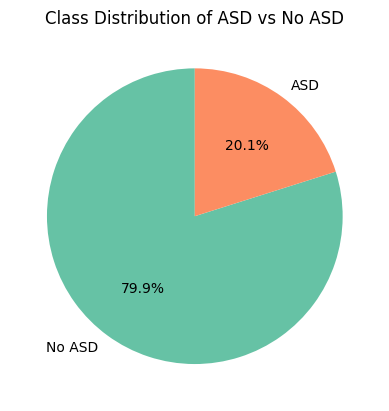

In [13]:
palette = sb.color_palette('Set2', 2)

# Visualizing the target variable - Class/ASD

labels = ['No ASD', 'ASD']
plt.pie(train_data_cleaned['Class/ASD'].value_counts().values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=palette)
plt.title('Class Distribution of ASD vs No ASD')
plt.show()

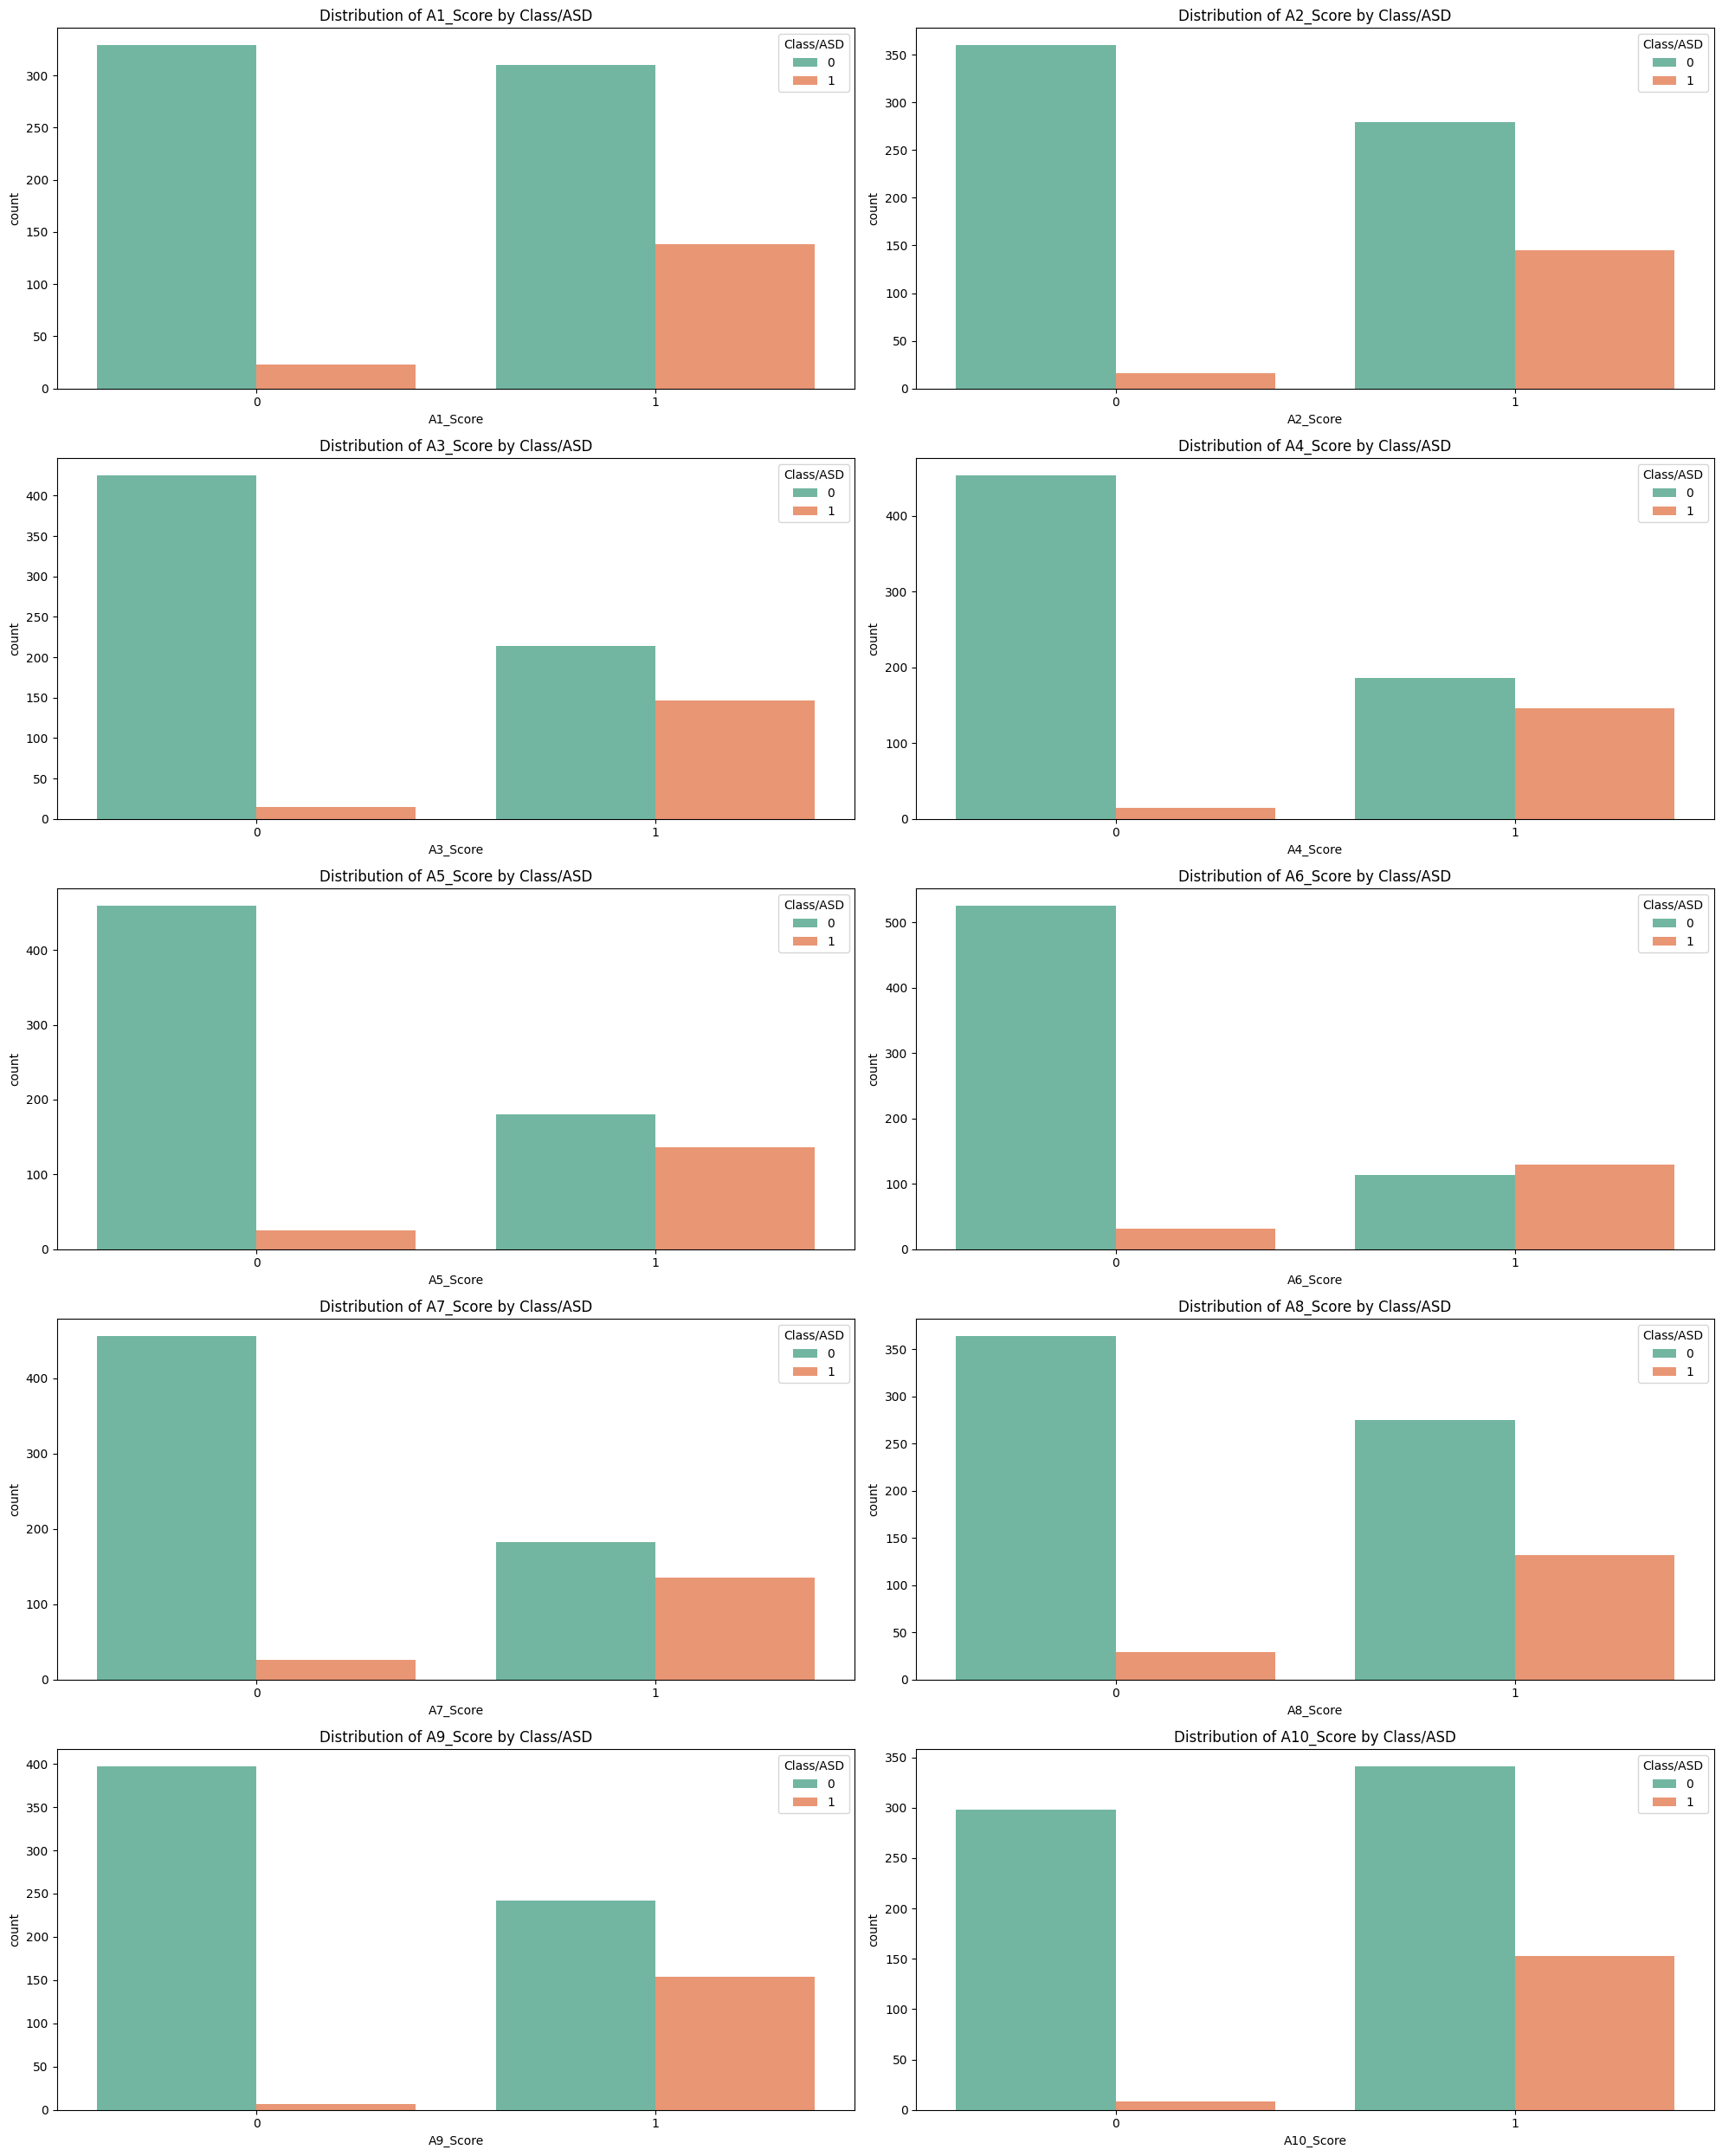

In [14]:
# Visualize Score Distributions
score_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

plt.figure(figsize=(20, 25))

for i, col in enumerate(score_columns, 1):
    plt.subplot(5, 2, i)
    sb.countplot(x=col, hue='Class/ASD', data=train_data_cleaned, palette='Set2')
    plt.title(f'Distribution of {col} by Class/ASD')

plt.tight_layout()
plt.show()

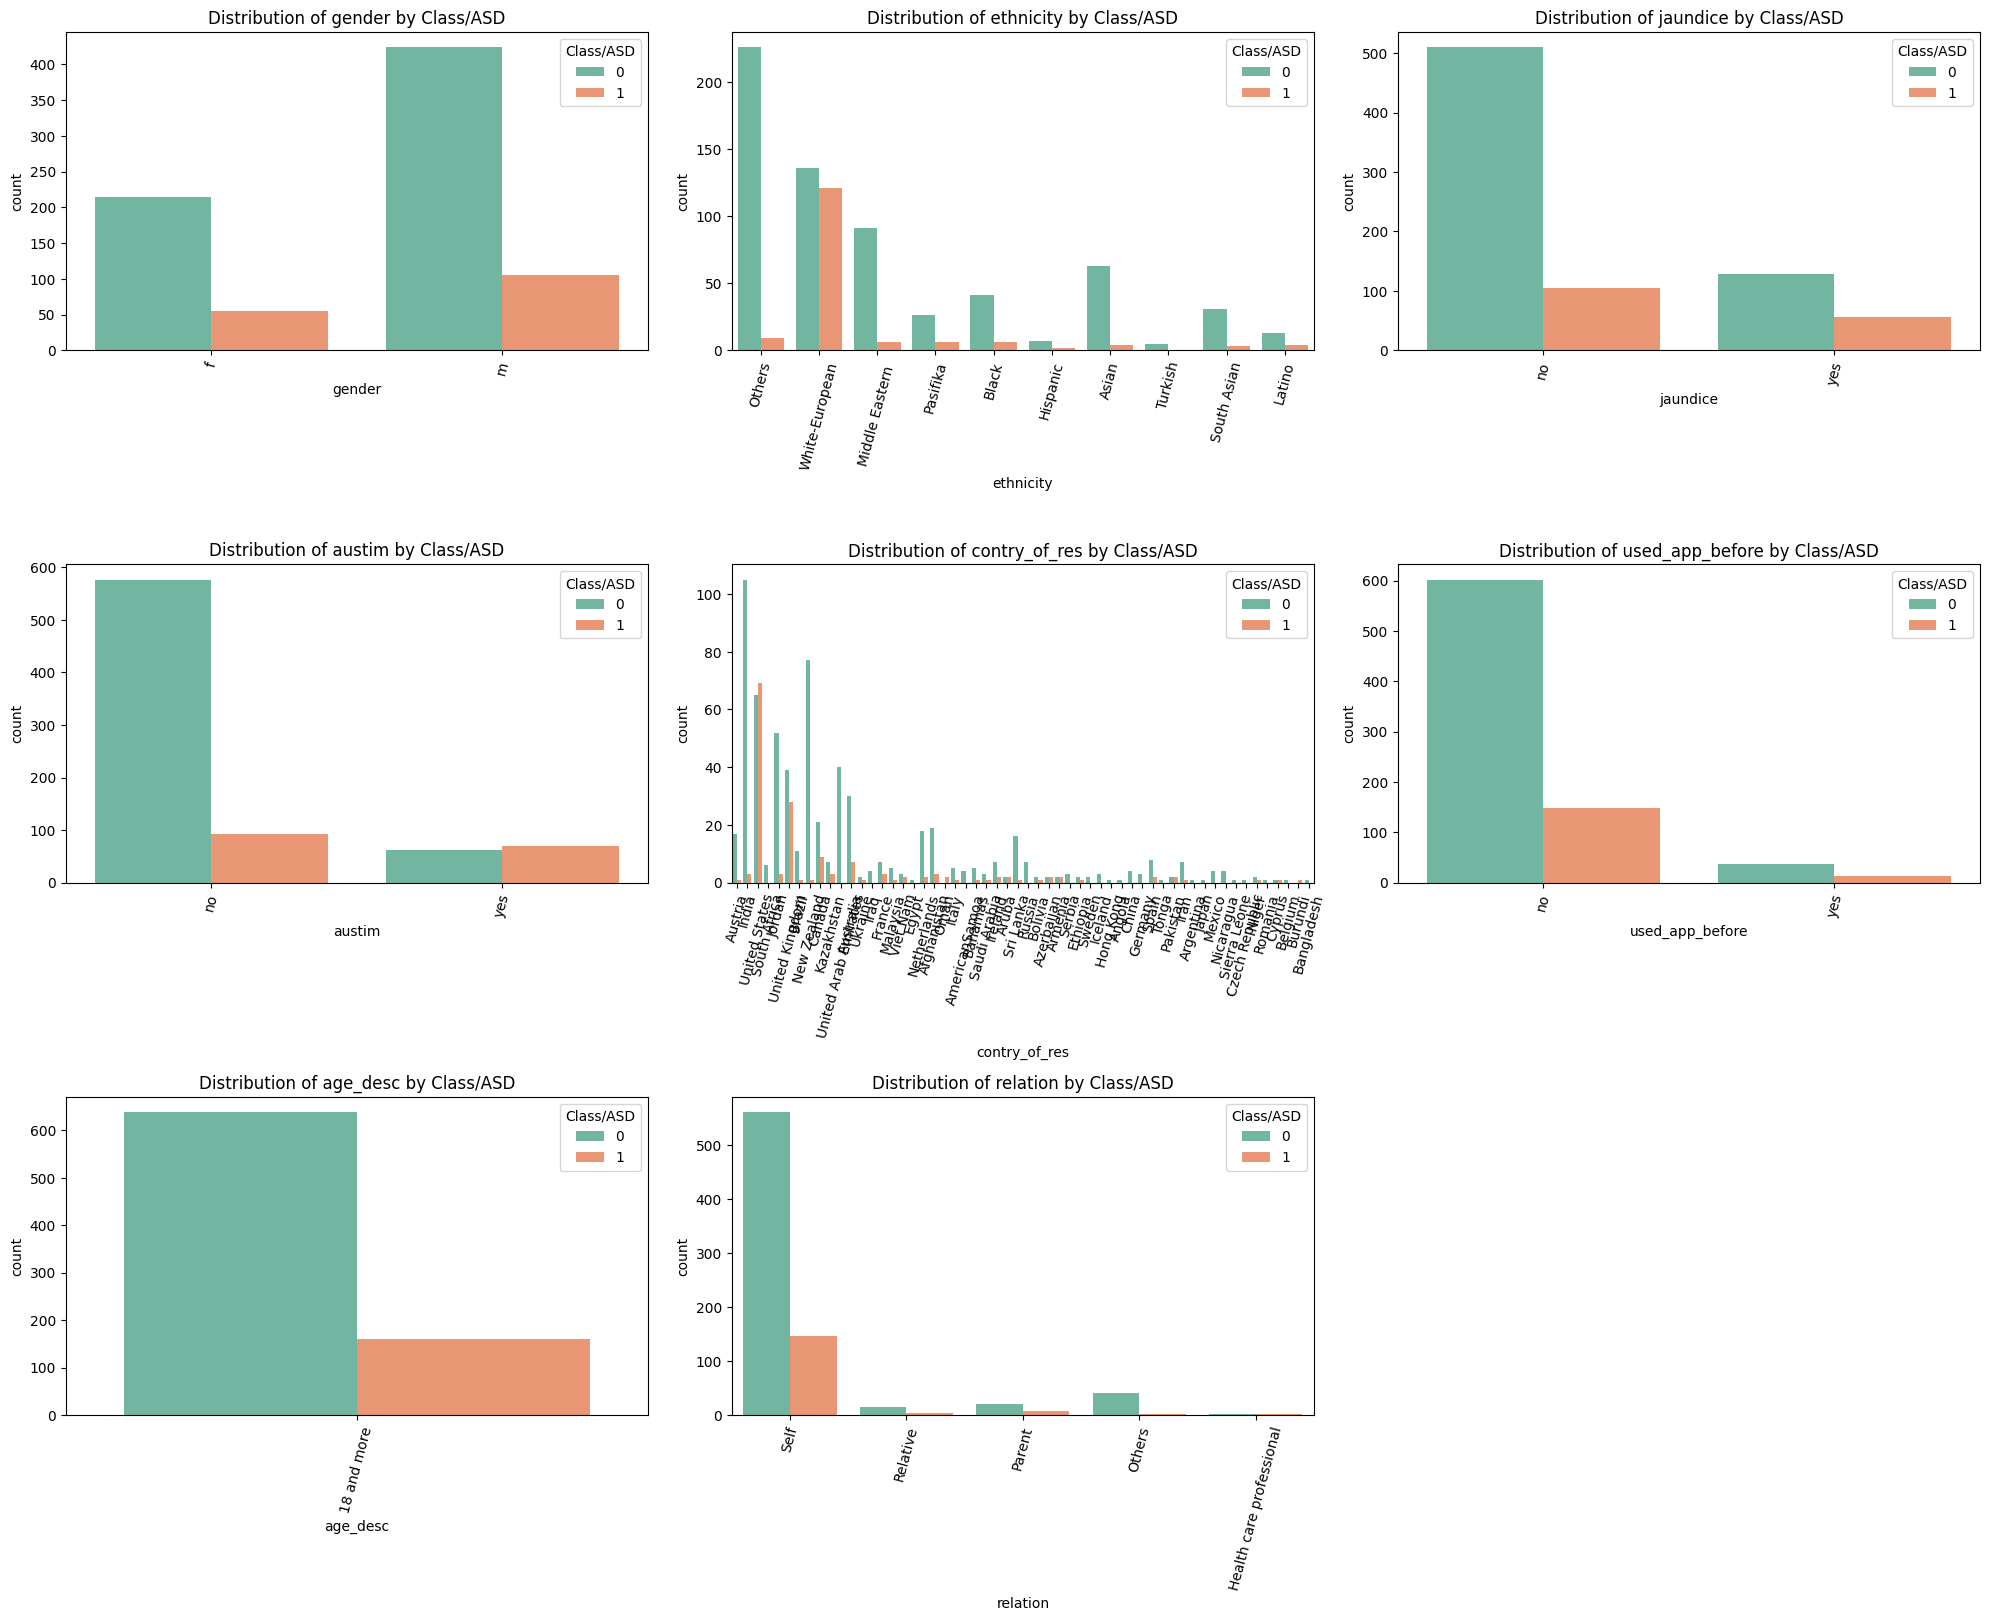

In [15]:
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

# Plot categorical feature distributions with respect to Class/ASD

plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sb.countplot(x=col, hue='Class/ASD', data=train_data_cleaned, palette='Set2')
    plt.xticks(rotation=75)
    plt.title(f'Distribution of {col} by Class/ASD')

plt.tight_layout()
plt.show()

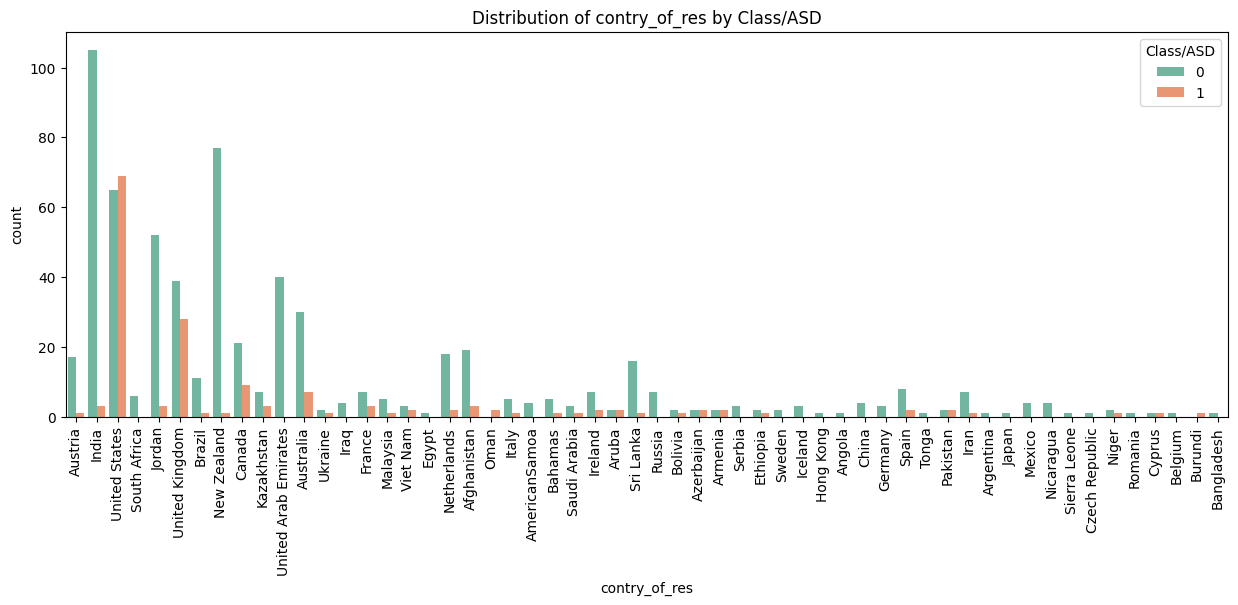

In [16]:
plt.figure(figsize=(15, 5))
sb.countplot(data=train_data_cleaned, x='contry_of_res', hue='Class/ASD', palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of contry_of_res by Class/ASD')
plt.show()

<ipython-input-18-cb98c698b339>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=train_data_cleaned[col], palette=custom_palette)
<ipython-input-18-cb98c698b339>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=train_data_cleaned[col], palette=custom_palette)


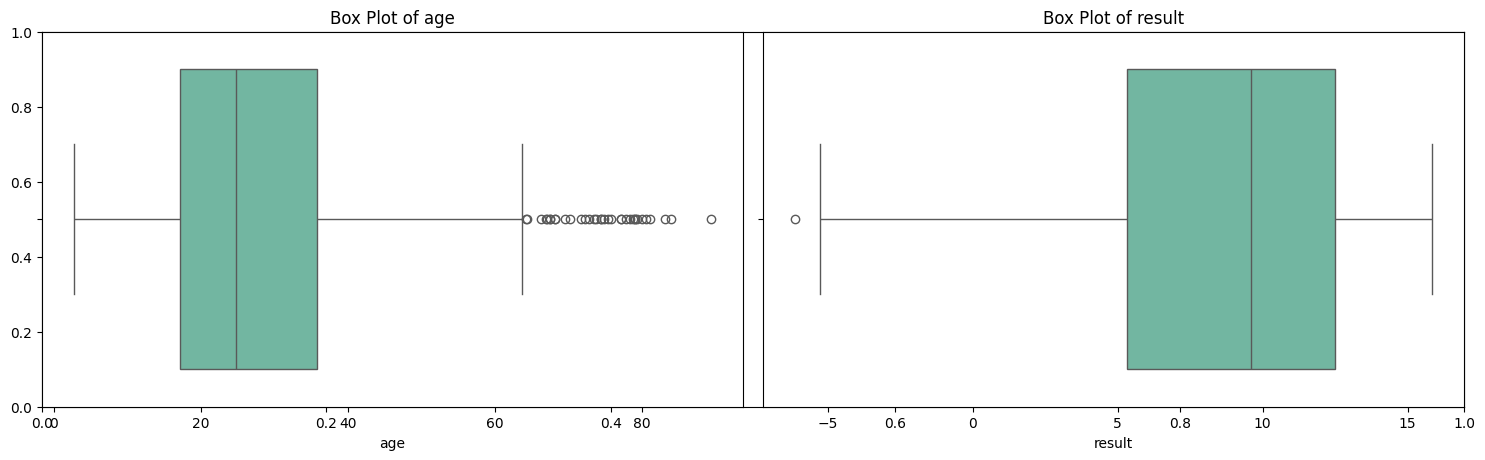

In [18]:
# Box plots for the columns with continuous data

plt.subplots(figsize=(15, 5))
custom_palette = ['#66c2a5']

floats=['age','result']

for i, col in enumerate(floats):
    plt.subplot(1, len(floats), i + 1)
    sb.boxplot(x=train_data_cleaned[col], palette=custom_palette)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)


plt.tight_layout()
plt.show()


In [19]:
# Encode categorical features
label_encoders = {}
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for column in categorical_columns:
    le = LabelEncoder()
    train_data_cleaned[column] = le.fit_transform(train_data_cleaned[column])
    label_encoders[column] = le

In [20]:
# Separate features and target
X = train_data_cleaned.drop(columns=['Class/ASD'])
y = train_data_cleaned['Class/ASD']

In [21]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [22]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [24]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [25]:
y_val_pred_rf = rf_classifier.predict(X_val)

In [26]:
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
conf_matrix_val_rf = confusion_matrix(y_val, y_val_pred_rf)
class_report_val_rf = classification_report(y_val, y_val_pred_rf)

In [27]:
print("Random Forest Accuracy =", accuracy_val_rf * 100)
print("Random Forest Confusion Matrix")
print(conf_matrix_val_rf)
print("Random Forest Classification Report")
print(class_report_val_rf)

Random Forest Accuracy = 90.234375
Random Forest Confusion Matrix
[[105  20]
 [  5 126]]
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       125
           1       0.86      0.96      0.91       131

    accuracy                           0.90       256
   macro avg       0.91      0.90      0.90       256
weighted avg       0.91      0.90      0.90       256



In [28]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=100, C=1.0, solver='lbfgs', random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:
y_val_pred_lr = lr_classifier.predict(X_val)

In [30]:
accuracy_val_lr = accuracy_score(y_val, y_val_pred_lr)
conf_matrix_val_lr = confusion_matrix(y_val, y_val_pred_lr)
class_report_val_lr = classification_report(y_val, y_val_pred_lr)

In [31]:
print("\nLogistic Regression Accuracy =", accuracy_val_lr * 100)
print("Logistic Regression Confusion Matrix")
print(conf_matrix_val_lr)
print("Logistic Regression Classification Report")
print(class_report_val_lr)


Logistic Regression Accuracy = 82.8125
Logistic Regression Confusion Matrix
[[100  25]
 [ 19 112]]
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       125
           1       0.82      0.85      0.84       131

    accuracy                           0.83       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.83      0.83       256



In [32]:
# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
y_val_pred_svm = svm_classifier.predict(X_val)

In [34]:
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
conf_matrix_val_svm = confusion_matrix(y_val, y_val_pred_svm)
class_report_val_svm = classification_report(y_val, y_val_pred_svm)

In [35]:
print("\nSVM Accuracy =", accuracy_val_svm * 100)
print("SVM Confusion Matrix")
print(conf_matrix_val_svm)
print("SVM Classification Report")
print(class_report_val_svm)


SVM Accuracy = 87.5
SVM Confusion Matrix
[[ 99  26]
 [  6 125]]
SVM Classification Report
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       125
           1       0.83      0.95      0.89       131

    accuracy                           0.88       256
   macro avg       0.89      0.87      0.87       256
weighted avg       0.88      0.88      0.87       256



In [36]:
#Neural Network
nn_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100, random_state=42)
nn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [37]:
y_val_pred_nn = nn_classifier.predict(X_val)

In [38]:
accuracy_val_nn = accuracy_score(y_val, y_val_pred_nn)
conf_matrix_val_nn = confusion_matrix(y_val, y_val_pred_nn)
class_report_val_nn = classification_report(y_val, y_val_pred_nn)

In [39]:
print("\nNeural Network Accuracy =", accuracy_val_nn * 100)
print("Neural Network Confusion Matrix")
print(conf_matrix_val_nn)
print("Neural Network Classification Report")
print(class_report_val_nn)


Neural Network Accuracy = 87.890625
Neural Network Confusion Matrix
[[103  22]
 [  9 122]]
Neural Network Classification Report
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       125
           1       0.85      0.93      0.89       131

    accuracy                           0.88       256
   macro avg       0.88      0.88      0.88       256
weighted avg       0.88      0.88      0.88       256



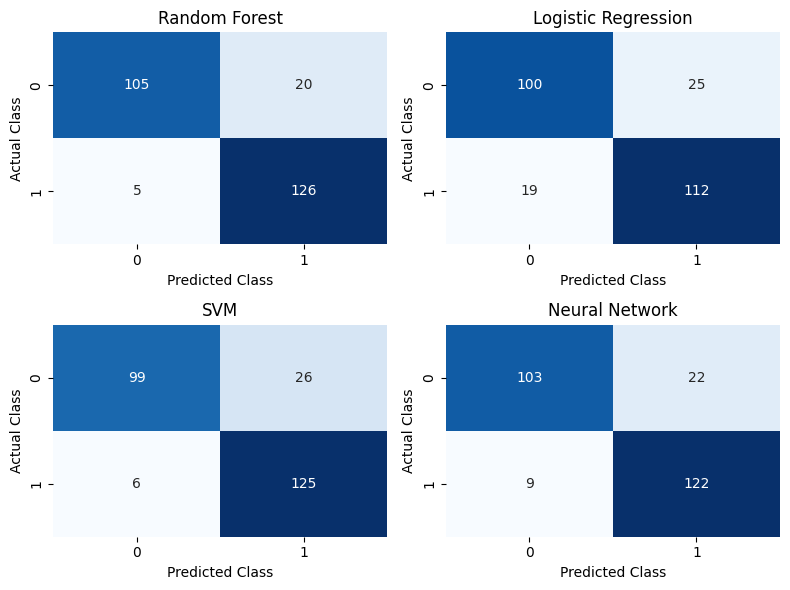

In [41]:
# Plotting confusion matrices
def plot_confusion_matrices(cm_rf, cm_lr, cm_svm, cm_nn):
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))

    sb.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
    axes[0, 0].set_title('Random Forest')
    axes[0, 0].set_ylabel('Actual Class')
    axes[0, 0].set_xlabel('Predicted Class')

    sb.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
    axes[0, 1].set_title('Logistic Regression')
    axes[0, 1].set_ylabel('Actual Class')
    axes[0, 1].set_xlabel('Predicted Class')

    sb.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
    axes[1, 0].set_title('SVM')
    axes[1, 0].set_ylabel('Actual Class')
    axes[1, 0].set_xlabel('Predicted Class')

    sb.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
    axes[1, 1].set_title('Neural Network')
    axes[1, 1].set_ylabel('Actual Class')
    axes[1, 1].set_xlabel('Predicted Class')

    plt.tight_layout()
    plt.show()


plot_confusion_matrices(conf_matrix_val_rf, conf_matrix_val_lr, conf_matrix_val_svm, conf_matrix_val_nn)


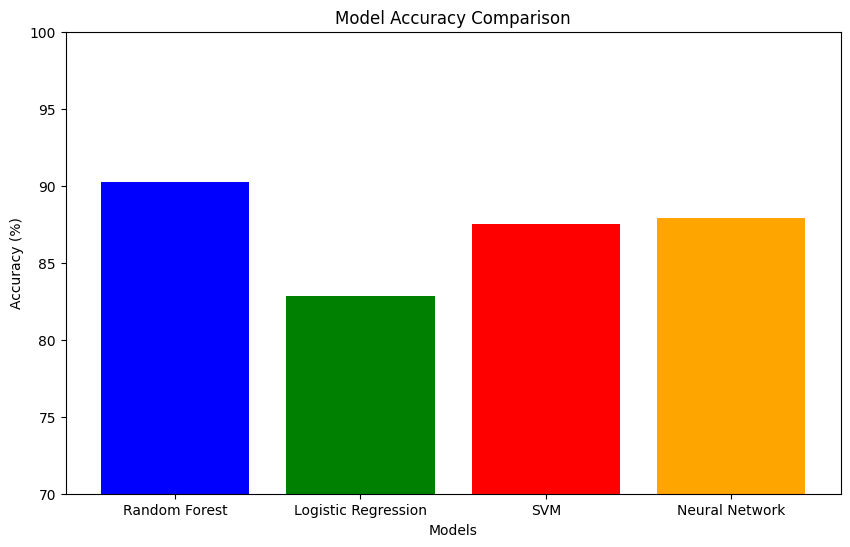

In [42]:
# Bar Chart for Model Accuracies
model_names = ['Random Forest', 'Logistic Regression', 'SVM', 'Neural Network']
accuracies = [accuracy_val_rf * 100, accuracy_val_lr * 100, accuracy_val_svm * 100, accuracy_val_nn * 100]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(70, 100)
plt.show()